In [1]:
import sklearn.datasets
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = sklearn.datasets.load_boston()
Boston = pd.DataFrame(data=data.data, columns=data.feature_names)
Boston['MEDV'] = data.target

In [3]:
print(data.DESCR)
Boston.head()   

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a3aa90f50>]],
      dtype=object)

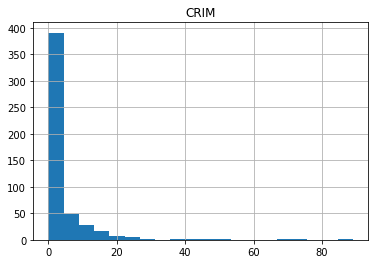

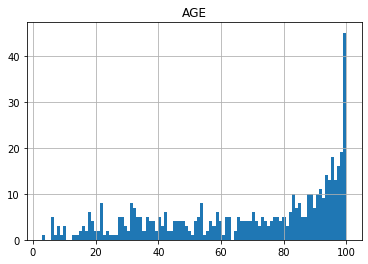

In [4]:
Boston.hist(column='CRIM', bins=20)
Boston.hist(column='AGE', bins=100)

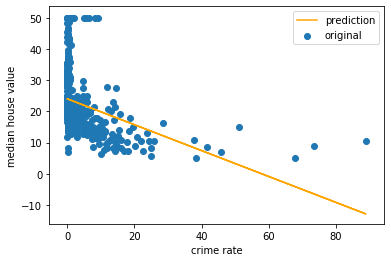

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X=Boston[['CRIM']], y=Boston['MEDV'])
plot_pred = plt.plot(Boston['CRIM'], lin_reg_model.predict(X=Boston[['CRIM']]), color='orange', label='prediction')
plot_origin = plt.scatter(Boston[['CRIM']], Boston[['MEDV']], label='original')
plt.xlabel('crime rate')
plt.ylabel('median house value')
plt.legend()

In [6]:
print('Coefficience between Median Value and \'Per Capita Criminal Rate\': '
    + str(lin_reg_model.coef_[0].round(4)))
print('Seems like in the Boston dataset there was an upper limit = 50k,\n'
    'corner of our scatter plot. Most of our data samples represent crime\n'
    'rate which is very close to 0 and the shape of original data does\'t\n'
    'keep linear relationship. I would say, it\'s more about modified\n'
    'a/(b*x) function. This linear regression cannot predict any reasonable\n'
    'value basing on a crime rate over 60 (median value is always positive.')

Coefficience between Median Value and 'Per Capita Criminal Rate': -0.4152
Seems like in the Boston dataset there was an upper limit = 50k,
corner of our scatter plot. Most of our data samples represent crime
rate which is very close to 0 and the shape of original data does't
keep linear relationship. I would say, it's more about modified
a/(b*x) function. This linear regression cannot predict any reasonable
value basing on a crime rate over 60 (median value is always positive.


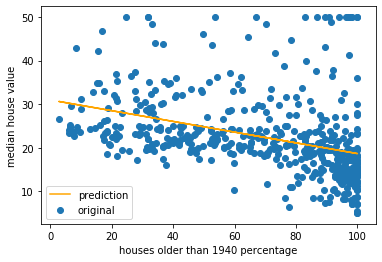

In [7]:
lin_reg_model.fit(X=Boston[['AGE']], y=Boston['MEDV'])
plot_pred = plt.plot(Boston['AGE'], lin_reg_model.predict(X=Boston[['AGE']]),
                     color='orange', label='prediction')
plot_origin = plt.scatter(Boston[['AGE']], Boston[['MEDV']], label='original')
plt.xlabel('houses older than 1940 percentage')
plt.ylabel('median house value')
plt.legend()

In [8]:
print('Coefficience between Median Value and Proportion of Units '
    'Built before 1940: ' + str(lin_reg_model.coef_[0].round(4)))
print('Looking at this plot, I can say, that there\'s a certain, linear\n'
      'relationship. Data points are widespread, but in the\n'
      'neighbourhood of prediction line, they are more common.\n'
      'On the other hand, there are more outstanding points in\n'
      'the upper part of the plot. Summarizing, there is a weak\n'
      'dependence between age rate and median value: The older the house,\n'
      'the cheaper it is. But this rule has many exceptions.')

Coefficience between Median Value and Proportion of Units Built before 1940: -0.1232
Looking at this plot, I can say, that there's a certain, linear
relationship. Data points are widespread, but in the
neighbourhood of prediction line, they are more common.
On the other hand, there are more outstanding points in
the upper part of the plot. Summarizing, there is a weak
dependence between age rate and median value: The older the house,
the cheaper it is. But this rule has many exceptions.
